In [55]:
conda install tiktoken openai pandas numpy matplotlib scikit-learn plotly

Retrieving notices: done
Channels:
 - https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
 - https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free
 - https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/conda-forge
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import tiktoken
from openai import OpenAI

In [3]:
input_data = "data/fine_food_reviews_1k.csv"
df = pd.read_csv(input_data, index_col=0)
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()
df["combined"] = ("Title: " + df.Summary.str.strip() + "; Content: " + df.Text.str.strip())
df.head(2)

,Time,ProductId,UserId,Score,Summary,Text,combined
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...


In [4]:
df['combined']

0      Title: where does one  start...and stop... wit...
1      Title: Arrived in pieces; Content: Not pleased...
2      Title: It isn't blanc mange, but isn't bad . ....
3      Title: These also have SALT and it's not sea s...
4      Title: Happy with the product; Content: My dog...
                             ...                        
995    Title: Delicious!; Content: I have ordered the...
996    Title: Good Training Treat; Content: My dog wi...
997    Title: Jamica Me Crazy Coffee; Content: Wolfga...
998    Title: Party Peanuts; Content: Great product f...
999    Title: I love Maui Coffee!; Content: My first ...
Name: combined, Length: 1000, dtype: object

In [5]:
embedding_model = 'text-embedding-v3'
embedding_encoding = 'cl100k_base'
max_tokens = 8000

In [6]:
top_n = 1000
df = df.sort_values("Time").tail(top_n * 2)
df.drop("Time", axis = 1, inplace=True)
encoding = tiktoken.get_encoding(embedding_encoding)
df["n_tokens"] = df.combined.apply(lambda x: len(encoding.encode(x)))
df = df[df.n_tokens <= max_tokens].tail(top_n)
len(df)

1000

In [7]:
from openai import OpenAI

client = OpenAI(
    api_key = "sk-81c01436f2784241a5d94f2c4fb14cbf",
    base_url = "https://dashscope.aliyuncs.com/compatible-mode/v1"
)

In [8]:
res = client.embeddings.create(input="abc", model=embedding_model)
print(res.data[0].embedding)

[-0.025253048166632652, 0.0386127233505249, -0.074822336435318, 0.0174836628139019, -0.05559743568301201, -0.04675886780023575, 0.010936198756098747, 0.010355786420404911, 0.034234173595905304, 0.029183562844991684, 0.005595382768660784, 0.0032228182535618544, -0.0071889725513756275, -0.03162740543484688, 0.019856227561831474, -0.031586673110723495, -0.016679231077432632, -0.004559295251965523, 0.004027250222861767, -0.05478282272815704, -0.04488525539636612, 0.030079638585448265, -0.01996823586523533, 0.009642998687922955, 0.01001975778490305, 0.09710203856229782, -0.08256117254495621, -0.030548041686415672, -0.02999817579984665, -0.10606279969215393, 0.008945484645664692, -0.005992507562041283, 0.010681631974875927, -0.03103681094944477, 0.007214429322630167, -0.007525000721216202, -0.008044317364692688, -0.013746618293225765, -0.12642815709114075, 0.005284811370074749, 0.008303975686430931, 0.008848749101161957, 0.013094927184283733, -0.03492659330368042, 0.017351288348436356, -0.08

In [9]:
def embedding_text(text, model="text-embedding-v3"):
    res = client.embeddings.create(input=text, model=model)
    return res.data[0].embedding

In [10]:
df["embedding"] = df.combined.apply(embedding_text)
output_datapath = "data/fine_food_reviews_with_embeddings_1k_331.csv"
df.to_csv(output_datapath)

In [11]:
e0 = df["embedding"][0]
e0

[-0.0028806296177208424,
 0.06060419976711273,
 -0.036652032285928726,
 0.0022823079489171505,
 -0.053694549947977066,
 -0.039412032812833786,
 0.002441538730636239,
 0.08090853691101074,
 -0.04763412848114967,
 -0.0402226597070694,
 0.04485482722520828,
 0.041689515113830566,
 -0.043928395956754684,
 -0.02779300883412361,
 0.05975497141480446,
 -0.01697496697306633,
 0.009901260025799274,
 0.00867566466331482,
 -0.0929521769285202,
 -0.08824280649423599,
 -0.042615946382284164,
 0.007652727887034416,
 -0.04697790741920471,
 0.06342210620641708,
 0.02779300883412361,
 0.02956867404282093,
 -0.02225370891392231,
 -0.012265595607459545,
 -0.017746994271874428,
 -0.05307692661881447,
 0.002834790386259556,
 0.012477902695536613,
 0.03487636521458626,
 -0.02746489830315113,
 0.056589655578136444,
 -0.011976084671914577,
 -0.0025935317389667034,
 -0.00755622424185276,
 -0.04500923305749893,
 0.00961657427251339,
 0.014234267175197601,
 0.021057065576314926,
 0.009732378646731377,
 -0.063460

In [20]:
embedding_datapath = "data/fine_food_reviews_with_embeddings_1k_331.csv"
df_embedded = pd.read_csv(embedding_datapath)

In [21]:
df_embedded["embedding"]

0      [0.02956356294453144, 0.004509695805609226, -0...
1      [-0.01647561974823475, 0.0430537685751915, -0....
2      [-0.03126620128750801, 0.015595543198287487, -...
3      [-0.025133904069662094, 0.012920547276735306, ...
4      [-0.015522914007306099, -0.008580457419157028,...
                             ...                        
995    [-0.01558662299066782, 0.045387640595436096, -...
996    [-0.03234296292066574, 0.02003648318350315, -0...
997    [-0.1041664332151413, -0.02141282521188259, -0...
998    [-0.02361336350440979, 0.01824408769607544, -0...
999    [-0.034697581082582474, -0.003270990215241909,...
Name: embedding, Length: 1000, dtype: object

In [22]:
len(df_embedded["embedding"][0])

22713

In [23]:
type(df_embedded["embedding"][0])

str

In [24]:
df_embedded["embedding"][0]

'[0.02956356294453144, 0.004509695805609226, -0.027636341750621796, -0.03542231395840645, -0.032647114247083664, -0.06926430761814117, 0.00946265272796154, 0.07296456396579742, -0.05669882521033287, 0.01858804188668728, 0.008132870309054852, 0.009597557596862316, -0.016651185229420662, -0.06355973333120346, 0.023897534236311913, 0.012642566114664078, -0.004006209783256054, -0.030353723093867302, -0.03783133625984192, -0.0004824073694180697, -0.11008283495903015, 0.03927675262093544, -0.04552094638347626, 0.04829614609479904, 0.024649150669574738, 0.06302011013031006, -0.06868613511323929, -0.04690854623913765, 0.04027890786528587, -0.058163512498140335, 0.00577202532440424, -0.007270439062267542, 0.00825332198292017, -0.044133350253105164, 0.0031582326628267765, -0.007405344862490892, -0.00802205502986908, 0.011601867154240608, -0.045636579394340515, -0.012247486039996147, -0.034420158714056015, 0.06267321109771729, 0.02669200301170349, -0.0639837235212326, -0.014232522808015347, -0.02

In [25]:
import ast

df_embedded["embedding_vec"] = df_embedded["embedding"].apply(ast.literal_eval)

In [26]:
len(df_embedded["embedding_vec"][0])

1024

In [27]:
df_embedded.head(2)

,Unnamed: 0,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding,embedding_vec
0,19,B008JKSJJ2,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[0.02956356294453144, 0.004509695805609226, -0...","[0.02956356294453144, 0.004509695805609226, -0..."
1,18,B008JKSJJ2,A1XV4W7JWX341C,5,"Loved these gluten free healthy bars, saved $$...",These Kind Bars are so good and healthy & glut...,"Title: Loved these gluten free healthy bars, s...",96,"[-0.01647561974823475, 0.0430537685751915, -0....","[-0.01647561974823475, 0.0430537685751915, -0...."


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.manifold import TSNE

In [32]:
type(df_embedded["embedding_vec"])

pandas.core.series.Series

In [33]:
assert df_embedded["embedding_vec"].apply(len).nunique() == 1

In [34]:
matrix = np.vstack(df_embedded["embedding_vec"].values)

In [35]:
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)

In [36]:
vis_dims = tsne.fit_transform(matrix)

In [37]:
colors = ['red', 'darkorange', 'gold', 'turquoise', 'darkgreen']

In [38]:
x = [x for x, y in vis_dims]
y = [y for x, y in vis_dims]
color_indices = df_embedded.Score.values - 1 
assert len(vis_dims) == len(df_embedded.Score.values)

Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

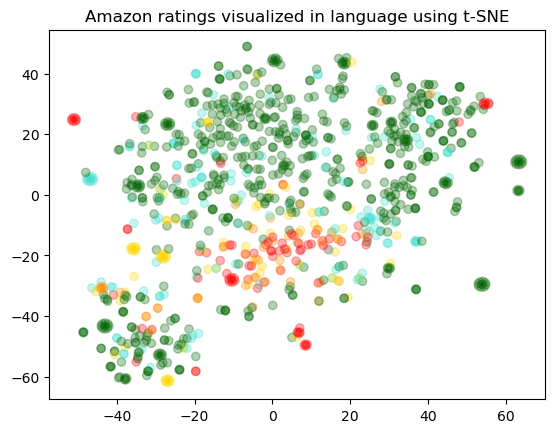

In [39]:
colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
plt.title("Amazon ratings visualized in language using t-SNE")

In [41]:
import numpy as np
from sklearn.cluster import KMeans
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42, n_init=10)
kmeans.fit(matrix)
df_embedded['Cluster'] = kmeans.labels_

In [43]:
df_embedded['Cluster']

0      1
1      3
2      0
3      1
4      0
      ..
995    3
996    1
997    3
998    2
999    1
Name: Cluster, Length: 1000, dtype: int32

In [44]:
df_embedded.head(2)

,Unnamed: 0,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding,embedding_vec,Cluster
0,19,B008JKSJJ2,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[0.02956356294453144, 0.004509695805609226, -0...","[0.02956356294453144, 0.004509695805609226, -0...",1
1,18,B008JKSJJ2,A1XV4W7JWX341C,5,"Loved these gluten free healthy bars, saved $$...",These Kind Bars are so good and healthy & glut...,"Title: Loved these gluten free healthy bars, s...",96,"[-0.01647561974823475, 0.0430537685751915, -0....","[-0.01647561974823475, 0.0430537685751915, -0....",3


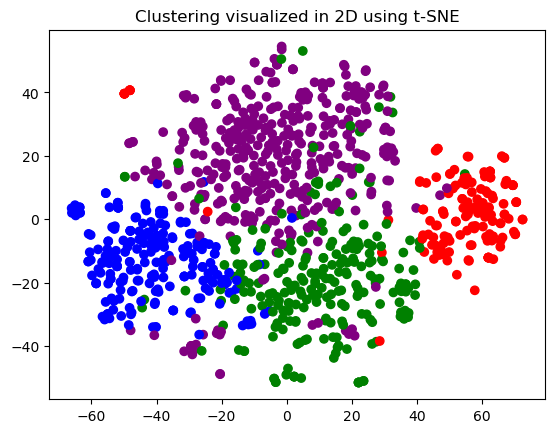

In [45]:
colors = ['red', 'green', 'blue', 'purple']
tsne_model = TSNE(n_components=2, random_state=42)
vis_data = tsne_model.fit_transform(matrix)

x = vis_data[:,0]
y = vis_data[:,1]

color_indices = df_embedded['Cluster'].values
colormap = matplotlib.colors.ListedColormap(colors)

plt.scatter(x, y, c=color_indices, cmap=colormap)
plt.title("Clustering visualized in 2D using t-SNE")
plt.show()

In [46]:
def cosine_similarity(a, b):
    return np.dot(a, b)/(np.linalg.norm(a) * np.linalg.norm(b))

In [48]:
type(df_embedded['embedding_vec'][0])

list

In [51]:
def search_reviews(df, product_description, n=3, pprint=True):
    product_embedding = embedding_text(product_description)
    df['similarity'] = df.embedding_vec.apply(lambda x: cosine_similarity(x, product_embedding))
    results = (
        df.sort_values('similarity', ascending=False)
        .head(n)
        .combined.str.replace('Titlel: ', '')
        .str.replace('; Content:', ': ')
    )
    if pprint:
        for r in results:
            print(r[:200])
            print()
    return results

In [52]:
res = search_reviews(df_embedded, 'delicious beans', n=3)

Title: Good quality, fast delivery:  I bought these to make homemade vanilla.  The quality of beans was very good.  Very "meaty" and full of beans.  It was also received very quickly and they were wel

Title: Fantastic Instant Refried beans:  Fantastic Instant Refried Beans have been a staple for my family now for nearly 20 years.  All 7 of us love it and my grown kids are passing on the tradition.

Title: Plump, juicy vanilla beans:  These are plump, juicy vanilla beans! Perfect for ice cream making and making vanilla extract. Very satisfied and will not buy expensive vanilla beans at the grocer



In [53]:
res = search_reviews(df_embedded, 'dog food', n=3)

Title: Healthy Dog Food:  This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.

Title: Paws up!:  We try different treats for our dogs and they seem to like the Holistic Select biscuits very much.  This has good quality ingredients just like their kibbles which our dogs like as w

Title: Paws up!:  We try different treats for our dogs and they seem to like the Holistic Select biscuits very much.  This has good quality ingredients just like their kibbles which our dogs like as w



In [54]:
res = search_reviews(df_embedded, 'awful', n=5)

Title: God Awful:  As a dabbler who enjoys spanning the entire spectrum of taste, I am more than willing to try anything once.  Both as a food aficionado and a lover of bacon, I just had to pick this 

Title: Inedible:  I am one of the least picky eaters that I know, but I had to throw my bowl out after a few spoons of this.  It was disgusting and inedible.  I wonder if anyone at these big companies

Title: Just Bad:  Watery and unpleasant.  Like Yoohoo mixed with dirty dish water.  I find it quite odd that Keurig would release a product like this.  I'm sure they can come up with a decent hot choc

Title: bot very cheesy:  Got this about a month ago.first of all it smells horrible...it tastes very peppery and not very cheesy. If you are going for the stuff at the movie theater this is not it

Title: New Recipe is Awful:  These used to be my favorite animal crackers but Austin has recently changed their recipe to a "new and improved" version and as a result, what was once a tasty snack 